# Assignment: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
data = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
df = pd.read_csv(data, parse_dates=[0])
df = df.set_index('id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [5]:
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [6]:
top20 = df.nlargest(20, 'mag', keep = 'all')
print (top20)

                              time  latitude  longitude   depth  mag magType  \
id                                                                             
usc000nzvd 2014-04-01 23:46:47.260  -19.6097   -70.7691   25.00  8.2     mww   
usc000rki5 2014-06-23 20:53:09.700   51.8486   178.7352  109.00  7.9     mww   
usc000p27i 2014-04-03 02:43:13.110  -20.5709   -70.4931   22.40  7.7     mww   
usc000phx5 2014-04-12 20:14:39.300  -11.2701   162.1481   22.56  7.6     mww   
usb000pr89 2014-04-19 13:28:00.810   -6.7547   155.0241   43.37  7.5     mww   
usc000piqj 2014-04-13 12:36:19.230  -11.4633   162.0511   39.00  7.4     mww   
usb000slwn 2014-10-14 03:51:34.460   12.5262   -88.1225   40.00  7.3     mww   
usb000pq41 2014-04-18 14:27:24.920   17.3970  -100.9723   24.00  7.2     mww   
usc000pft9 2014-04-11 07:07:23.130   -6.5858   155.0485   60.53  7.1     mww   
usc000sxh8 2014-11-15 02:31:41.720    1.8929   126.5217   45.00  7.1     mww   
usc000stdc 2014-11-01 18:57:22.380  -19.

Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [7]:
df['country/state'] = df['place'].str.split(', ').str.get(-1)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country/state
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [8]:
pd.Series(df['country/state']).unique()

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', 'South of the Fiji Islands', 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Wyoming', 'Antarctica', 'Chile', 'Utah', 'Indonesia',
       'Solomon Islands', 'Micronesia', 'Oklahoma', 'Hawaii', 'Russia',
       'Arizona', 'Philippines', 'Bolivia', 'Greece', 'Japan',
       'Puerto Rico', 'Iran', 'Tonga', 'Wallis and Futuna', 'Colorado',
       'Guam', 'CA', 'Carlsberg Ridge', 'Idaho', 'Pakistan',
       'Off the west coast of northern Sumatra', 'Burma', 'China', 'Peru',
       'Off the east coast of the North Island of New Zealand',
       'Costa Rica', 'Reykjanes Ridge', 'East Timor',
       'Central East Pacific Rise', 'Mid-Indian Ridge', 'Japan region',
       'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Northern Mid-Atlantic Ridge', 'Taiwan', 'Arkansas',
       'South Sandwich Islands', 'Colombia', 'Dominican Republic',

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [9]:
filtered = df[df['mag'] >= 4]
filtered.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country/state
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

      country/state  count
0         Indonesia   2116
1  Papua New Guinea   1354
2             Japan   1150
3             Chile   1124
4       New Zealand    758


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Indonesia'),
  Text(1, 0, 'Papua New Guinea'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Chile'),
  Text(4, 0, 'New Zealand')])

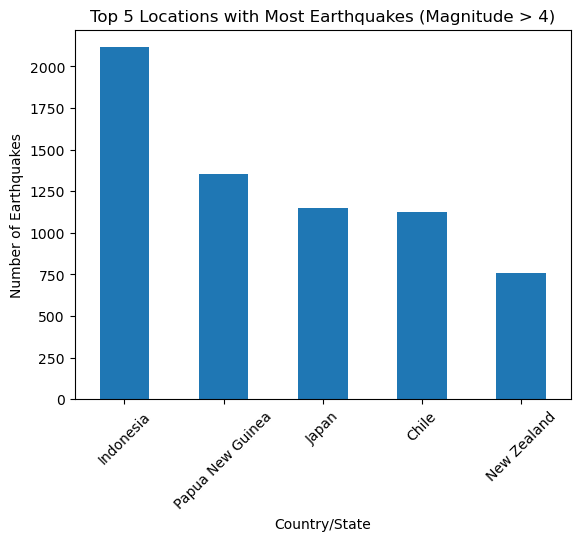

In [60]:
top5locations = filtered['country/state'].value_counts().head(5).reset_index()
top5locations.columns = ['country/state', 'count']
print(top5locations)

top5locations.plot(kind='bar', x = 'country/state', y = 'count', legend = False)
plt.title('Top 5 Locations with Most Earthquakes (Magnitude > 4)')
plt.xlabel('Country/State')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)


### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

Text(0, 0.5, 'Number of Earthquakes')

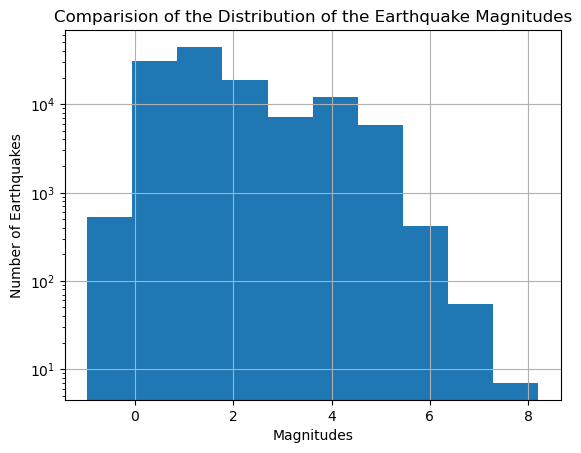

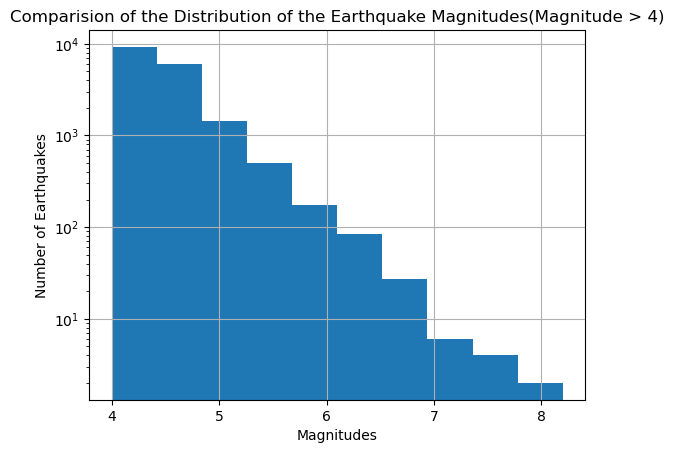

In [20]:
df.hist('mag')
plt.title('Comparision of the Distribution of the Earthquake Magnitudes')
plt.yscale('log')
plt.xlabel('Magnitudes')
plt.ylabel('Number of Earthquakes')

filtered.hist('mag')
plt.title('Comparision of the Distribution of the Earthquake Magnitudes (Magnitude > 4)')
plt.yscale('log')
plt.xlabel('Magnitudes')
plt.ylabel('Number of Earthquakes')

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

In California, earthquakes occur frequently, but they are generally of relatively lower magnitudes, usually below 4.


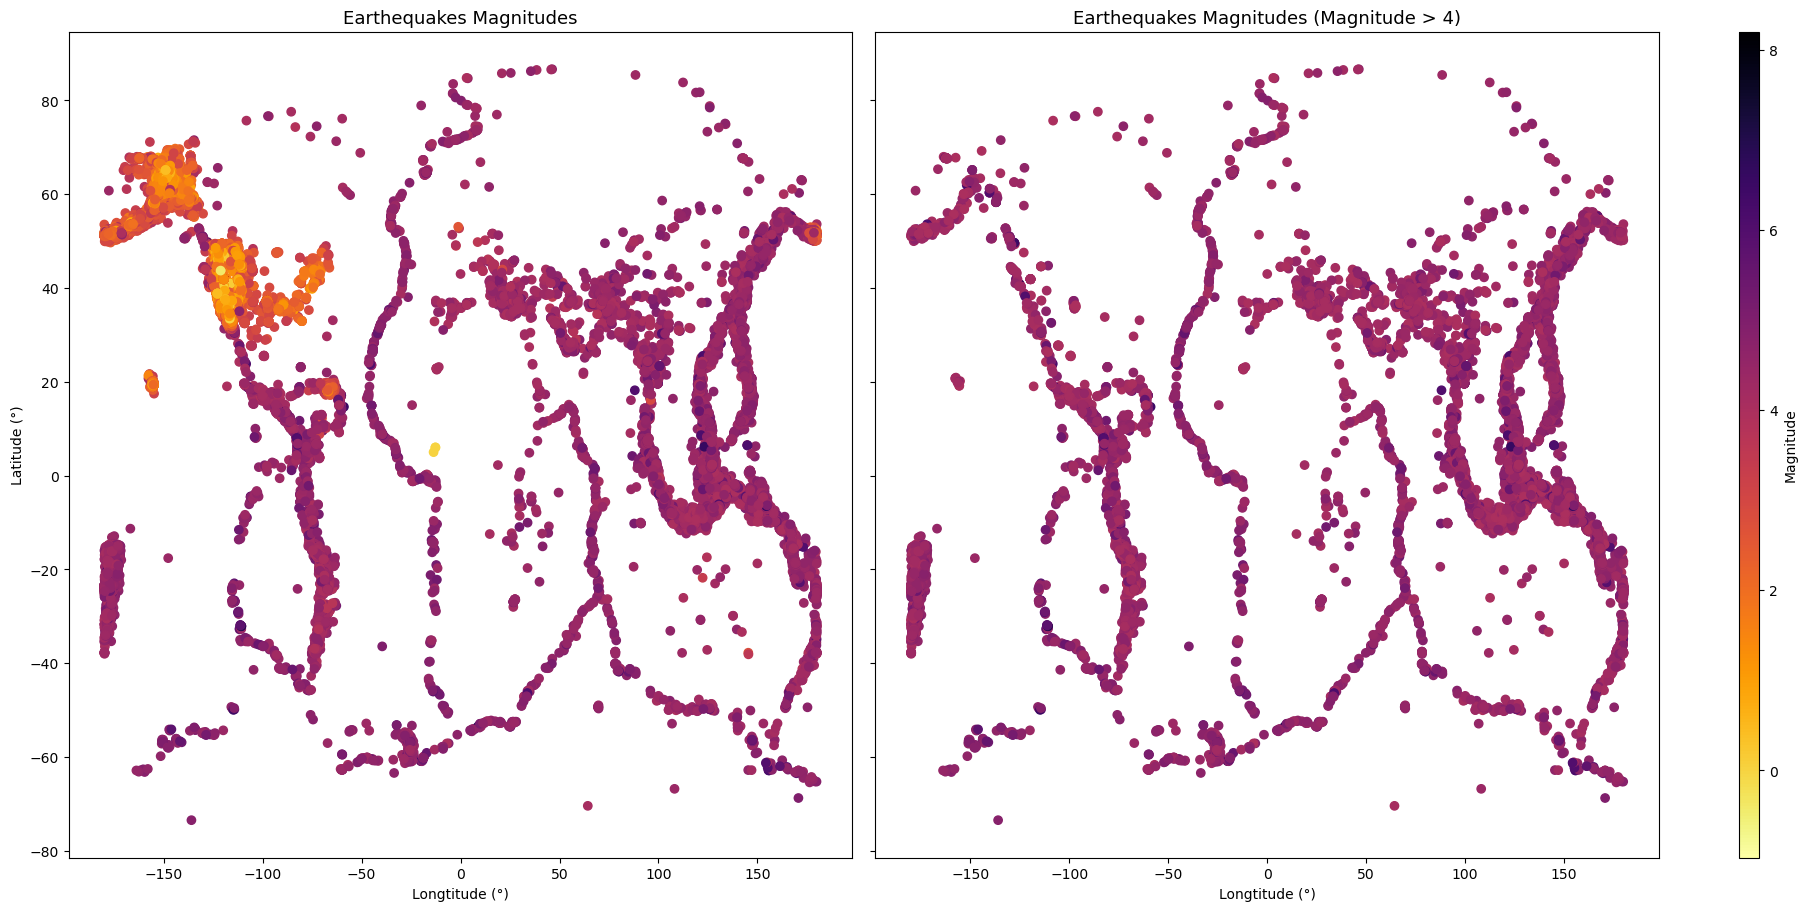

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,9), sharey=True, constrained_layout=True)
vmin = min(df['mag'].min(), filtered['mag'].min())
vmax = max(df['mag'].max(), filtered['mag'].max())
cmap = 'inferno_r'

sp1 = ax1.scatter(df['longitude'], df['latitude'], c = df['mag'], cmap = cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Earthequakes Magnitudes', fontsize=13)
sp2 = ax2.scatter(filtered['longitude'], filtered['latitude'], c = filtered['mag'], cmap = cmap, vmin=vmin, vmax=vmax,)
ax2.set_title('Earthequakes Magnitudes (Magnitude > 4)', fontsize=13)

cbar = fig.colorbar(sp1, ax=[ax1, ax2], aspect=40, pad = 0.05)
cbar.set_label('Magnitude', fontsize=10)
cbar.ax.tick_params (labelsize=10)

ax1.tick_params(axis='y', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='x', labelsize=10)
ax1.set_ylabel('Latitude (°)', fontsize=10)
ax2.set_xlabel('Longtitude (°)', fontsize=10)
ax1.set_xlabel('Longtitude (°)', fontsize=10)

print ("In California, earthquakes occur frequently, but they are generally of relatively lower magnitudes, usually below 4.")